In [4]:
# 1) 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2) 합성 데이터 생성 (n_features=3: 다변량)
#    coef=True 로 실제 계수도 반환받아 비교 가능
X, y, coef_true = make_regression(
    n_samples=200,
    n_features=3,
    noise=10,
    coef=True,
    random_state=42
)

# 특성 이름 지정
feature_names = ['feature_1', 'feature_2', 'feature_3']
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df

,feature_1,feature_2,feature_3,target
0,0.130741,-1.430141,-0.440044,-64.558855
1,1.502357,-0.269407,0.717542,154.776889
2,0.647689,0.496714,-0.138264,61.896041
3,0.341756,-0.759133,0.150394,16.485672
4,0.856399,-1.514847,-0.446515,-31.907412
...,...,...,...,...
195,-1.328186,0.208864,-1.959670,-234.412161
196,1.366874,-2.301921,-1.515191,-64.259633
197,-0.420645,-0.234587,-1.415371,-161.098832
198,-0.830950,-0.863991,0.048522,-74.938010


■ 모델 계수 (Coefficient):
  feature_1: 추정=71.732, 실제=72.004
  feature_2: 추정=21.857, 실제=22.925
  feature_3: 추정=72.637, 실제=72.225
■ 절편 (Intercept): -0.489

■ MSE: 104.292
■ RMSE: 10.212
■ R²: 0.988


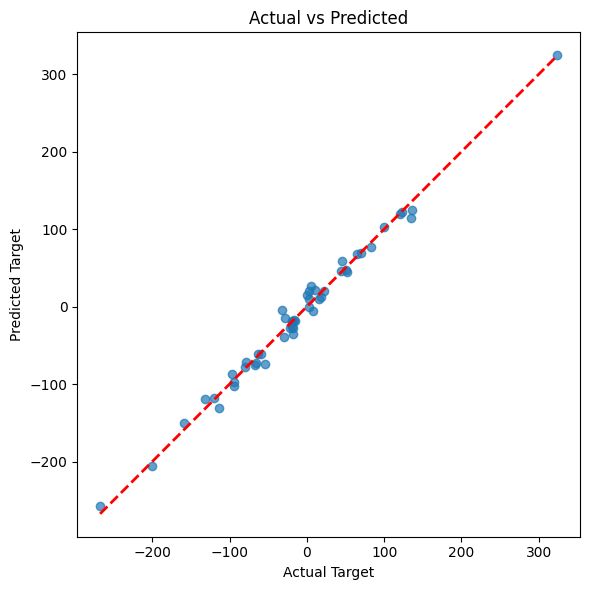

In [3]:

# 3) 학습/테스트 데이터 분할 (75% 학습, 25% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names], df['target'],
    test_size=0.25,
    random_state=0
)

# 4) 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 5) 예측 및 평가
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2  = r2_score(y_test, y_pred)

print("■ 모델 계수 (Coefficient):")
for name, coef_est, coef_t in zip(feature_names, lr.coef_, coef_true):
    print(f"  {name}: 추정={coef_est:.3f}, 실제={coef_t:.3f}")
print(f"■ 절편 (Intercept): {lr.intercept_:.3f}")
print(f"\n■ MSE: {mse:.3f}")
print(f"■ RMSE: {rmse:.3f}")
print(f"■ R²: {r2:.3f}")

# 6) 실제 vs 예측 시각화
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.tight_layout()
plt.show()
